# Project 3: Modeling a Soccer Kick in Elastica - CMA Optimization
## By Bhargav Chandaka and Luke LaLonde 

In [ ]:
%matplotlib notebook
import numpy as np
from elastica import *
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from leg_sim import leg_sim_run, LegSimulator, RodCallback
from cma import CMAES

In [3]:
POP_SIZE = 3
initial_centroid = np.array([-np.pi/4, -np.pi/4])
initial_sigma = np.pi/8
cma_es = CMAES(initial_centroid, initial_sigma, POP_SIZE, 2)
print('Solution: ',cma_es.run(leg_sim_run))

Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2578.38it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2731.82it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2740.92it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2805.29it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2594.04it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2548.11it/s]

Final time of simulation is :  0.9999999999998981
Solution:  [-0.39249018 -0.49016447]


Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2671.42it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2795.07it/s]

Final time of simulation is :  0.9999999999998981


<IPython.core.display.Javascript object>


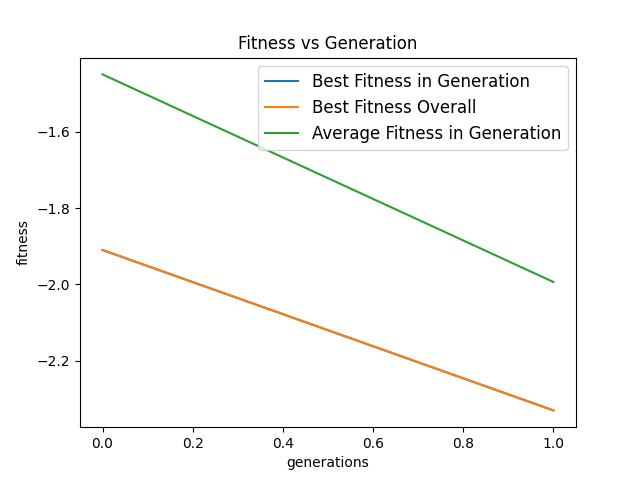

Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2698.88it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2562.70it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2545.59it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2618.98it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2665.63it/s]


Final time of simulation is :  0.9999999999998981
Total steps 10000


100%|███████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2765.00it/s]

Final time of simulation is :  0.9999999999998981
Final best fitness:  -2.3302708421321614


In [4]:
cma_es.plot_fitness()

In [ ]:
leg_angle, foot_angle = -0.39249018, -0.49016447

In [ ]:
leg_sim = LegSimulator()

# setting up test params
n_elem = 2
start_rod_1 = np.array([0.0, 0.0, 1.5])
direction1 = np.array([0.0, 0.0, -1.0])
# direction2 = np.array([1.0, 0.0, 0.0])
direction2 = np.array([np.cos(leg_angle), 0.0, np.sin(leg_angle)])
normal1 = np.array([1.0, 0.0, 0.0])
# normal2 = np.array([0.0, 0.0, 1.0])
normal2 = np.array([np.cos(leg_angle+np.pi/2), 0.0, np.sin(leg_angle+np.pi/2)])

roll_direction = np.array([0.0, 1.0, 0.0])#np.cross(direction1, normal1)
base_length = 0.5
base_radius = 0.25
base_area = np.pi * base_radius ** 2
density = 5000
nu = 0.1
E = 1e6
# For shear modulus of 1e4, nu is 99!
poisson_ratio = 0
shear_modulus = E / (poisson_ratio + 1.0)
shear_modulus_unshearable = E / (-0.7 + 1.0)

# Create rod 1
torso = CosseratRod.straight_rod(
    n_elem,
    start_rod_1,
    direction1,
    normal1,
    base_length,
    base_radius,
    density,
    nu,
    E,
    shear_modulus=shear_modulus_unshearable,
    poisson_ratio=poisson_ratio
)
leg_sim.append(torso)
start_rod_2 = start_rod_1 + direction1 * base_length

straight_leg = CosseratRod.straight_rod(
    n_elem,
    start_rod_2,
    direction2,
    normal2,
    base_length,
    base_radius/2,
    density,
    nu,
    E,
    shear_modulus=shear_modulus_unshearable,
    poisson_ratio=poisson_ratio
)
leg_sim.append(straight_leg)
start_rod_3 = start_rod_2 + direction2 * base_length
direction3 = np.array([np.cos(foot_angle), 0.0, np.sin(foot_angle)])
normal3 = np.array([np.cos(foot_angle+np.pi/2), 0.0, np.sin(foot_angle+np.pi/2)])

foot = CosseratRod.straight_rod(
    n_elem,
    start_rod_3,
    direction3,
    normal3,
    base_length/3,
    base_radius/2,
    density,
    nu,
    E,
    shear_modulus=shear_modulus_unshearable,
    poisson_ratio=poisson_ratio
)
leg_sim.append(foot)

leg_sim.constrain(torso).using(
    OneEndFixedRod, constrained_position_idx=(0,), constrained_director_idx=(0,)
)

# Connect rod 1 and rod 2
leg_sim.connect(
    first_rod=torso, second_rod=straight_leg, first_connect_idx=-1, second_connect_idx=0
).using(
    HingeJoint, k=1e6, nu=0, kt=5e3, normal_direction=roll_direction
)  # 1e-2

leg_sim.connect(
    first_rod=straight_leg, second_rod=foot, first_connect_idx=-1, second_connect_idx=0
).using(
    FixedJoint, k=1e5, nu=0, kt=5e5
)  # 1e-2
final_time = 1
# leg_sim.add_forcing_to(rod1).using(
#     GravityForces
# )
# leg_sim.add_forcing_to(straight_leg).using(
#     GravityForces, acc_gravity=np.array([0, 0, -9.8])
# )
leg_sim.add_forcing_to(foot).using(
    GravityForces, acc_gravity=np.array([0, 0, -9.8])
)
pp_list_torso = defaultdict(list)
pp_list_straight_leg = defaultdict(list)
pp_list_foot = defaultdict(list)
leg_sim.collect_diagnostics(torso).using(
    RodCallback, step_skip=1000, callback_params=pp_list_torso
)
leg_sim.collect_diagnostics(straight_leg).using(
    RodCallback, step_skip=1000, callback_params=pp_list_straight_leg
)
leg_sim.collect_diagnostics(foot).using(
    RodCallback, step_skip=1000, callback_params=pp_list_foot
)
leg_sim.finalize()

timestepper = PositionVerlet()
# timestepper = PEFRL()

dl = base_length / n_elem
dt = 1e-4
total_steps = int(final_time / dt)
print("Total steps", total_steps)
integrate(timestepper, leg_sim, final_time, total_steps)
max_timesteps = len(pp_list_torso['time'])
print(max_timesteps)

<IPython.core.display.Javascript object>


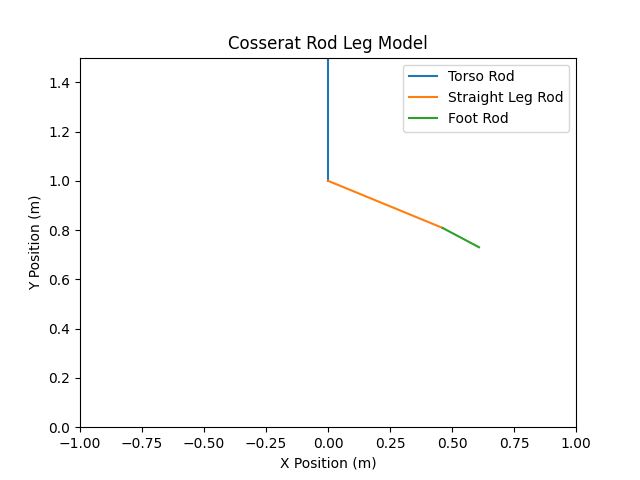

In [9]:
timestep = 0
x_vals_t, y_vals_t, z_vals_t = [pp_list_torso['position'][timestep][i] for i in range(3)]
x_vals_c, y_vals_c, z_vals_c = [pp_list_straight_leg['position'][timestep][i] for i in range(3)]
x_vals_f, y_vals_f, z_vals_f = [pp_list_foot['position'][timestep][i] for i in range(3)]

fig, ax = plt.subplots()
torso_line = ax.plot(x_vals_t, z_vals_t, label="Torso Rod")
straight_leg_line  = ax.plot(x_vals_c, z_vals_c, label="Straight Leg Rod")
foot_line  = ax.plot(x_vals_f, z_vals_f, label="Foot Rod")
ax.set_title("Cosserat Rod Leg Model")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_xlim(-1,1)
ax.set_ylim(0,1.5)
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


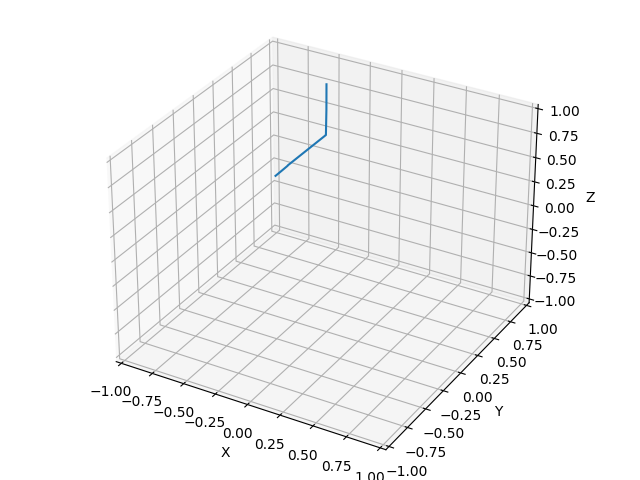

/tmp/ipykernel_10995/1601479406.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


In [10]:
fig = plt.figure()
ax = p3.Axes3D(fig)
x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

line, = ax.plot(x_vals, y_vals, z_vals)
def animate(timestep):
#     line.remove()
    global line
    if timestep != len(pp_list_torso['position']) -1:
        line.remove()
    x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

    # line.set(np.sin(x + i / 50))  # update the data.
    line, = ax.plot(x_vals, y_vals, z_vals)
    
    return line
ani = animation.FuncAnimation(
    fig, animate, interval=50)
ax.set(xlim3d=(-1, 1), xlabel='X')
ax.set(ylim3d=(-1, 1), ylabel='Y')
ax.set(zlim3d=(-1, 1), zlabel='Z')
plt.show()